In [ ]:
# REDS creator
import random
import math
import time
from math import dist
import networkx as nx
import matplotlib.pyplot as plt
    
def sum_costs(i,j,S):
    global G, nodes, d
    Ni = [n for n in G[i]]
    Nj = [n for n in G[j]]
    set_Ni = set(Ni)
    set_Nj = set(Nj)
    k = len(set_Ni.intersection(set_Nj))
    c = 0
    for p in Ni:
        c = (d[i][j] / (1 + S * k)) + c
    return c

def dist_toroidal(i,j):
    global nodes
    p1 = nodes[i]
    p2 = nodes[j]
    dx = 0
    dy = 0
    if p1[0] <= p2[0]:
        dx = min(p1[0] + (1-p2[0]), p2[0] - p1[0])
    else:
        dx = min(p2[0] + (1-p1[0]), p1[0] - p2[0])
    if p1[1] <= p2[1]:
        dy = min(p1[1] + (1-p2[1]), p2[1] - p1[1])
    else:
        dy = min(p2[1] + (1-p1[1]), p1[1] - p2[1])
    d = math.sqrt(dx**2 + dy**2)
    return d
    
def reds(n,R,E,S,t):
    global G, nodes, explored_edges, d
    d = []
    for i in range(n):
        temp = [0 for p in range(n)]
        d.append(temp)
    for i in range(n):
        for j in range(n):
            #d[i][j] = dist(nodes[i],nodes[j])
            d[i][j] = dist_toroidal(i,j)
    NR = []
    for i in range(n):
        temp = []
        for j in range(n):
            if i != j and d[i][j] < R:
                temp.append(j)
        NR.append(temp)
    start_time = time.time()
    while(time.time() - start_time < t):
        i = random.randint(0,n-1)
        N = [n for n in G[i]]
        N2 = []
        for j in NR[i]:
            if j not in N:
                N2.append(j)
        if len(N2) != 0:
            j = N2[random.randint(0,len(N2)-1)]
            G.add_edge(i,j)
            if not (E >= sum_costs(i,j,S) and E >= sum_costs(j,i,S)):
                G.remove_edge(i,j)
    #return G


# Usage
# reds(n,R,E,S,t)
# n = number of vertices
# R = Reach   - [0,1]
# E = Energy  - [0,1]
# S = Sinergy - [0,1]
# t = maximum time (stop condition)
    

d = []
R = 0.4
E = 0.15
counter = 1
for n in range(100,200,50):
    for S in [0.0, 0.5, 1.0]:
        #R = 0.1 / math.sqrt(n/1000)
        G = nx.Graph()
        string_S = str(S)
        file     = open("C:\\Users\\jgd\\Documents\\FireFighter\\reds_test\\" + "reds" + str(n) + "_" + string_S[0] + string_S[2] + ".mtx" , "w")
        file_pos = open("C:\\Users\\jgd\\Documents\\FireFighter\\reds_test\\" + "reds" + str(n) + "_" + string_S[0] + string_S[2] + ".pos" , "w")
        edges    = []
        explored = []
        nodes = []
        for i in range(n):
            x = random.random()
            y = random.random()
            p = (x,y)
            nodes.append(p)
            G.add_node(i,pos=(x,y))
            file_pos.write(str(i+1) + " " + str(x) + " " + str(y) + "\n")
        file_pos.close()
        reds(n,R,E,S,2*n)
        file.write("n=" + str(len(G.nodes())) + " " + "m=" + str(len(G.edges())) + " OPT=[]" + "\n")
        for edge in G.edges():
            file.write(str(edge[0]+1) + " " + str(edge[1]+1) + "\n")
        file.close()
        av_degree = 0
        for e in nx.degree(G):
            av_degree = av_degree + e[1]
        av_degree = av_degree / n
        density   = nx.density(G)
        conn_comp = nx.number_connected_components(G)
        average_clustering = nx.average_clustering(G)
        degree_assortativity_coefficient = nx.degree_assortativity_coefficient(G)
        print("--------------------------------")
        print("n = " + str(n))
        print("R = " + str(R))
        print("E = " + str(E))
        print("S = " + str(S))
        print("density: " + str(density))
        print("av degree: " + str(av_degree))
        print("av clustering: " + str(average_clustering))
        print("assortativity: " + str(degree_assortativity_coefficient))
        print("conn. comp.: " + str(conn_comp))
        #H = G.copy()
        #pos=nx.get_node_attributes(H,'pos')
        #plt.figure(counter)
        #nx.draw_networkx(H,pos,node_size =2,with_labels = False)
        #counter = counter + 1
#plt.show()

--------------------------------
n = 100
R = 0.4
E = 0.15
S = 0.0
density: 0.018585858585858588
av degree: 1.84
av clustering: 0.20999999999999996
assortativity: 0.24175824175824273
conn. comp.: 21
--------------------------------
n = 100
R = 0.4
E = 0.15
S = 0.5
density: 0.02
av degree: 1.98
av clustering: 0.2616666666666666
assortativity: 0.48253546834812816
conn. comp.: 20


In [24]:
# (1) Load the graph topology
import networkx as nx
input_file = 'C:\\Users\\jgd\\Documents\\FireFighter\\reds_test\\reds150_10.mtx'
n = 150
m = 245

G = nx.Graph()
for j in range(0,n):
    G.add_node(j)

f = open(input_file, "r")
string = f.readline()
for i in range(0, m):        
    string = f.readline()
    string = string.split()
    j = int(string[0])-1
    k = int(string[1])-1
    G.add_edge(j, k)
f.close()

conn_comp = nx.number_connected_components(G)
n_nodes   = len(nx.nodes(G))
n_edges   = len(nx.edges(G))
av_degree = 0
for e in nx.degree(G):
    av_degree = av_degree + e[1]
av_degree = av_degree / n_nodes
density   = nx.density(G)
print("conn. comp.: " + str(conn_comp))
print("num vertices: " + str(n_nodes))
print("num edges: " + str(n_edges))
print("density: " + str(density))
print("av degree: " + str(av_degree))

conn. comp.: 16
num vertices: 150
num edges: 245
density: 0.02192393736017897
av degree: 3.2666666666666666


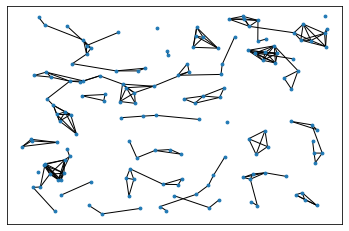

In [27]:
# (2) Add REDS positions 
input_file = 'C:\\Users\\jgd\\Documents\\FireFighter\\reds_test\\reds150_10.pos'
n = 150
pos = {}
counter = 0
import math
from math import dist

R = 0.1 / math.sqrt(n/1000)

f = open(input_file, "r")
for i in range(0, n):    
    string = f.readline()
    string = string.split()
    x = float(string[1])
    y = float(string[2])
    pos[counter]=(x,y)
    counter = counter+1
f.close()

nx.draw_networkx(G,pos,node_size =8,with_labels = False)

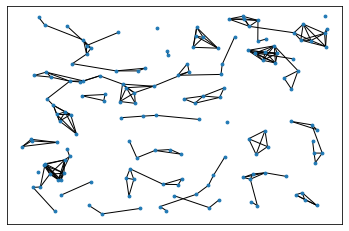

In [28]:
# Remove larger edges
for e in [e for e in G.edges]:
    if dist(pos[e[0]],pos[e[1]]) > R:
        G.remove_edge(e[0],e[1])
        
nx.draw_networkx(G,pos,node_size =8,with_labels = False)